In [68]:
import pathlib
import pylab as plt

#from matplotlib import pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import sys
print(sys.executable.split('miniconda3/envs/')[1])

blastasm/bin/python


In [69]:
sns.set_style('white')

In [70]:
PRJ='PRJNA747757'
BASE_PATH='/mnt/8TB_1/Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
PLOT_DATA_FILE='kraken2_minimap2_alignments_extended.csv'
ITERATION=4
PARAMS='sr'
#PARAMS='default'

In [71]:
df_accessions=pd.read_csv(PLOT_PATH+'accessions_kraken2.csv')

In [72]:
df_accessions.head()

,Accession,Code,Description
0,NC_009889.1,RD114,RD114 retrovirus
1,OM009282r,P251T/pangolin/2018,'Pangolin coronavirus strain P251T/pangolin/20...
2,MK636875.1,Dongyang pangolin virus,Dongyang pangolin virus isolate DYCS
3,NC_001403.1,Fujinami sarcoma virus,Fujinami sarcoma virus
4,NC_001494.1,Jaagsiekte sheep retrovirus,Jaagsiekte sheep retrovirus complete genome


In [73]:
df_accessions['Accession']=df_accessions['Accession'].str.strip()

## Read in CoV alignments

In [74]:
def get_virus_df(prj, base_path, plot_data_file):
    data_path=f'{base_path}{prj}/'
    plot_path=data_path+'general_plots/'
    df=pd.read_csv(plot_path+plot_data_file)
    df['Accession']=df['Accession'].str.strip()
    return df

In [75]:
prjs=['PRJNA573298', 'PRJNA606875', 'PRJNA610466', 'PRJNA686836', 'PRJNA607174']
base_paths=['/mnt/1TB_0/Data/Assembly/']*(len(prjs)-1)
base_paths.append('/mnt/8TB_0/Data/Assembly/')

In [76]:

df=get_virus_df(PRJ, BASE_PATH, PLOT_DATA_FILE)
df=df.rename(columns=lambda x: x.strip())


In [77]:
def get_df_all(df):
    df_all=df
    df_all=df_all.rename(columns=lambda x: x.strip())
    df_all.rename(columns = {'Accession':'Virus'}, inplace = True)
    df_all['N'] = df_all['N'].astype(int)
    return df_all

In [78]:
df_all=get_df_all(df)
df_all.shape

(256, 15)

In [79]:
### filter to => 10%

In [80]:
df_all = df_all.loc[df_all['Coverage%'] >=10]


In [81]:
df_pivot=df_all.pivot(index='Sample name', columns='Virus', values='N')

In [82]:
df_pivot.head()

Virus,NC_001403.1,NC_001494.1,NC_001940.1,NC_004994.2,NC_009889.1,NC_038668.1,NC_038923.1,NC_043382.1,OM009282r
Sample name,,,,,,,,,
CT_ED,NaN,NaN,1355.0,NaN,69410.0,NaN,1690.0,709.0,NaN
CT_ES,NaN,NaN,1084.0,NaN,51202.0,NaN,266.0,1086.0,NaN
CT_HT,NaN,NaN,2793.0,NaN,162134.0,NaN,1032.0,4466.0,NaN
CT_KY,NaN,NaN,5800.0,NaN,24006.0,NaN,674.0,2315.0,NaN
CT_LG,NaN,419.0,6251.0,739.0,284212.0,NaN,585.0,13285.0,NaN


Order ~ by host

In [83]:
order_by=df_accessions['Accession'].tolist()
cols=df_pivot.columns.tolist()
reorder_cols=[]
for o in order_by:
    for c in cols:
        if o.strip()==c.strip(): 
            reorder_cols.append(c)
assert len(cols)==len(reorder_cols)

In [84]:
df_pivot=df_pivot.reindex(columns= reorder_cols)

In [85]:
df_pivot.columns

Index(['NC_009889.1', 'OM009282r', 'NC_001403.1', 'NC_001494.1', 'NC_001940.1',
       'NC_004994.2', 'NC_038923.1', 'NC_043382.1', 'NC_038668.1'],
      dtype='object', name='Virus')

In [86]:
def get_samples(y_labels, df_datasets):
    y_names=[]
    for sra in y_labels:
        y_names.append(df_datasets.loc[df_datasets['SRA'] == sra.strip(), 'Name'].values[0])
    return y_names

In [87]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession.strip(), 'Code'].values[0])
    return x_codes

In [88]:
df_pivot.head()

Virus,NC_009889.1,OM009282r,NC_001403.1,NC_001494.1,NC_001940.1,NC_004994.2,NC_038923.1,NC_043382.1,NC_038668.1
Sample name,,,,,,,,,
CT_ED,69410.0,NaN,NaN,NaN,1355.0,NaN,1690.0,709.0,NaN
CT_ES,51202.0,NaN,NaN,NaN,1084.0,NaN,266.0,1086.0,NaN
CT_HT,162134.0,NaN,NaN,NaN,2793.0,NaN,1032.0,4466.0,NaN
CT_KY,24006.0,NaN,NaN,NaN,5800.0,NaN,674.0,2315.0,NaN
CT_LG,284212.0,NaN,NaN,419.0,6251.0,739.0,585.0,13285.0,NaN


In [89]:
df_pivot=df_pivot.T
data=df_pivot.to_numpy()

y_labels=df_pivot.index.tolist()
x_labels=list(df_pivot.columns.values)

In [90]:
x_labels

['CT_ED',
 'CT_ES',
 'CT_HT',
 'CT_KY',
 'CT_LG',
 'CT_LR',
 'CT_RM',
 'DK_LG',
 'HR_LG',
 'PGN_DM',
 'PGN_ES',
 'PGN_HT',
 'PGN_KY',
 'PGN_LG',
 'PGN_LI',
 'PGN_LR',
 'PGN_SH',
 'PGN_SN',
 'PN_LG']

In [91]:
y_names=get_accessions(y_labels, df_accessions)
x_codes=x_labels

In [92]:
plot_data = np.ma.masked_equal(data[:,:], 0)

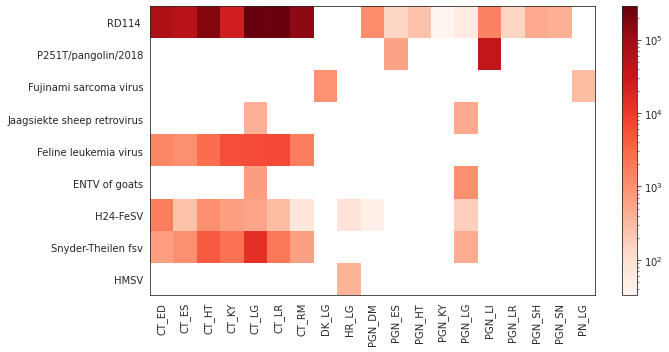

In [94]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect='auto',norm=matplotlib.colors.LogNorm())
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)
fig.colorbar(img)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"kraken2_minimap2_counts_log_scale_{PARAMS}_extended1_T.png", bbox_inches='tight')

## Coverage

In [101]:
df_cov=df_all.pivot(index='Sample name', columns='Virus', values='Coverage%')
order_by=df_accessions['Accession'].tolist()

In [102]:
cols=df_cov.columns.tolist()
reorder_cols=[]
for o in order_by:
    for c in cols:
        if o.strip()==c.strip(): 
            reorder_cols.append(c)
assert len(cols)==len(reorder_cols)
df_cov=df_cov.reindex(columns= reorder_cols)

In [103]:
df_cov=df_cov.T
data_cov=df_cov.to_numpy()
plot_data_cov = np.ma.masked_equal(data_cov[:,:], 0)


y_labels=df_pivot.index.tolist()
x_labels=list(df_pivot.columns.values)
y_names=get_accessions(y_labels, df_accessions)
x_codes=x_labels

In [104]:
#x_labels=list(df_cov.columns.values)
#x_codes=get_accessions(x_labels, df_accessions)
#y_labels=df_cov.index.tolist()
#y_names=get_samples(y_labels, df_datasets)

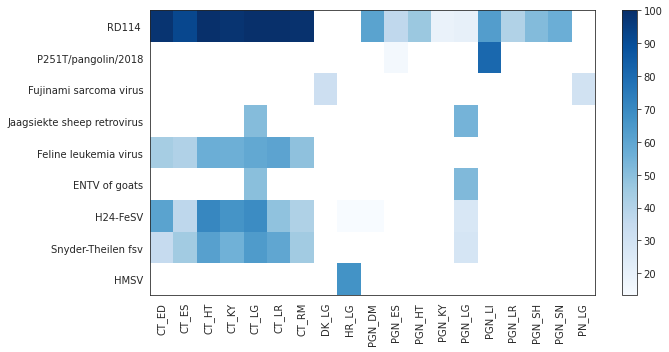

In [105]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
img=ax.imshow(plot_data_cov, cmap=plt.cm.get_cmap("Blues"), interpolation="nearest", aspect='auto')
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)
fig.colorbar(img)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"kraken2_minimap2_pct_cov_linear_scale_{PARAMS}_extended1_T.png", bbox_inches='tight')

## Box plots

In [129]:
### use 5% cutoff

In [130]:
df_all=get_df_all(df)
df_all.shape

(125, 15)

In [131]:
### filter to => 10%

In [132]:
df_all = df_all.loc[df_all['Coverage%'] >=5]


In [133]:
df_pivot=df_all.pivot(index='Sample name', columns='Virus', values='N')

In [136]:
df_pivot.head()

Virus,MK636875.1,NC_001403.1,NC_001494.1,NC_001940.1,NC_004994.2,NC_009889.1,NC_038923.1,NC_043382.1,OM009282r
Sample name,,,,,,,,,
CT_ED,NaN,NaN,NaN,1355.0,NaN,69410.0,1690.0,709.0,NaN
CT_HT,NaN,NaN,NaN,2793.0,NaN,162134.0,1032.0,4466.0,NaN
CT_KY,NaN,NaN,NaN,5800.0,NaN,24006.0,674.0,2315.0,NaN
DG_LG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1044.0,NaN
PGN_ES,NaN,NaN,NaN,NaN,NaN,136.0,3.0,6.0,621.0


In [137]:
df_corr=df_pivot.T.copy()
df_corr.head()

Sample name,CT_ED,CT_HT,CT_KY,DG_LG,PGN_ES,PGN_KY,PGN_LG,PGN_LI,PGN_SN,PN_LG
Virus,,,,,,,,,,
MK636875.1,NaN,NaN,NaN,NaN,NaN,NaN,1513.0,NaN,NaN,NaN
NC_001403.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.0
NC_001494.1,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,NaN,NaN
NC_001940.1,1355.0,2793.0,5800.0,NaN,NaN,NaN,NaN,55.0,20.0,NaN
NC_004994.2,NaN,NaN,NaN,NaN,NaN,NaN,1051.0,NaN,NaN,NaN


In [138]:

meds = df_corr.median()
meds.sort_values(ascending=False, inplace=True)
df_corr = df_corr[meds.index]

In [139]:
df_corr.head()

Sample name,CT_KY,CT_HT,CT_ED,DG_LG,PGN_LI,PGN_LG,PN_LG,PGN_ES,PGN_SN,PGN_KY
Virus,,,,,,,,,,
MK636875.1,NaN,NaN,NaN,NaN,NaN,1513.0,NaN,NaN,NaN,NaN
NC_001403.1,NaN,NaN,NaN,NaN,NaN,NaN,305.0,NaN,NaN,NaN
NC_001494.1,NaN,NaN,NaN,NaN,NaN,518.0,NaN,NaN,NaN,NaN
NC_001940.1,5800.0,2793.0,1355.0,NaN,55.0,NaN,NaN,NaN,20.0,NaN
NC_004994.2,NaN,NaN,NaN,NaN,NaN,1051.0,NaN,NaN,NaN,NaN


In [135]:
x_labels=list(df_corr.columns.values)
x_labels

['CT_KY',
 'CT_HT',
 'CT_ED',
 'DG_LG',
 'PGN_LI',
 'PGN_LG',
 'PN_LG',
 'PGN_ES',
 'PGN_SN',
 'PGN_KY']

In [ ]:

x_codes=get_accessions(x_labels, df_accessions)
y_labels=df_corr.index.tolist()
y_names=y_labels

In [ ]:
# Draw Plot
#plt.figure(figsize=(13,10), dpi= 200)

fig, ax = plt.subplots(1,1, figsize=(13,10), dpi= 80)
sns.boxplot(data=df_corr)
sns.stripplot(data=df_corr, color='black', size=2, jitter=1)
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.tick_params(which='major', labelrotation=90)
ax.set_yscale("log") 
plt.tight_layout()
fig.savefig(PLOT_PATH+f"kraken2_minipan2_box_plot_log_scale_{PARAMS}_sorted.png", bbox_inches='tight')